# Appendix: Code to demonstrate the Quantum Fourier Transform

N.B.  The IBM code demonstrating QFT can be found [here](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT).

Code for visualisation can be found [here](https://docs.quantum.ibm.com/build/circuit-visualization)

In our paper we wrote out the state equation for quantum fourier transform.  For $n$ qubits this becomes:

$ | \Psi \rangle \rightarrow \frac{1}{2^{n/2}} \sum_{c=0}^{2^n-1} exp(2 \pi iac/2^n) | c \rangle $

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# This code assumes that a user account has been setup with an API key using the save_account feature
# QiskitRuntimeService.save_account(channel="ibm_quantum", token=api_token, set_as_default=True)

# Load saved credentials
service = QiskitRuntimeService()

In [5]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)
circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [6]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


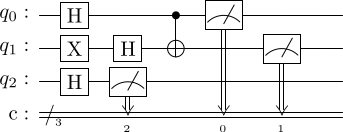

In [8]:
circuit.draw(output="latex")

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#from qiskit import Aer
from qiskit_aer import AerSimulator
import numpy as np
%matplotlib inline


ImportError: cannot import name 'execute' from 'qiskit' (/Users/skingham/Library/Anaconda/envs/py312_qiskit/lib/python3.12/site-packages/qiskit/__init__.py)

In [11]:
q = QuantumRegister(2,name='q')
qc = QuantumCircuit(q,name='qc')
#-------------------------------
qc.x( q[0] )
qc.h( q[0] )
qc.x( q[1] )
qc.h( q[1] )
print('__ Initial State __')
Wavefunction(qc)
qc.h( q[0] )
qc.cu1( m.pi/2,q[1],q[0] )
qc.h( q[1] )
print('\n__ After QFT __')
Wavefunction(qc)

__ Initial State __


NameError: name 'execute' is not defined

In [10]:
def Binary(N, total, LSB):
    '''
    Input: N (integer) total (integer) LSB (string)
    Returns the base-2 binary equivilant of N according to left or right least significant bit notation
    '''
    qubits = int(m.log(total,2))
    b_num = np.zeros(qubits)
    for i in np.arange(qubits):
        if( N/((2)**(qubits-i-1)) >= 1 ):
            if(LSB=='R'):
                b_num[i] = 1
            if(LSB=='L'):
             b_num[int(qubits-(i+1))] = 1
            N = N - 2**(qubits-i-1)
    B = []
    for j in np.arange(len(b_num)):
        B.append(int(b_num[j]))
    return B

def Wavefunction(obj, **kwargs):
    '''
    Prints a tidier versrion of the array statevector corresponding to the wavefuntion of a QuantumCircuit object
    Keyword Arguments: precision (integer) - the decimal precision for amplitudes
    column (Bool) - prints each state in a vertical column
    systems (array of integers) - seperates the qubits into different states
    show_systems (array of Bools) - indictates which qubit systems to print
    '''
    if(type(obj) == QuantumCircuit ):
        statevec = execute( obj, S_simulator, shots=1 ).result().get_statevector()
    if(type(obj) == np.ndarray):
        statevec = obj
    sys = False
    NL = False
    dec = 5
    if 'precision' in kwargs:
        dec = int( kwargs['precision'] )
    if 'column' in kwargs:
        NL = kwargs['column']
    if 'systems' in kwargs:
        systems = kwargs['systems']
        sys = True
        last_sys = int(len(systems)-1)
        show_systems = []
        for s_chk in np.arange(len(systems)):
            if( type(systems[s_chk])!=int ):
                raise Exception('systems must be an array of all integers')
        if 'show_systems' in kwargs:
            show_systems = kwargs['show_systems']
            if( len(systems)!=len(show_systems) ):
                raise Exception('systems and show_systems need to be arrays of equal length')
            for ls in np.arange(len(show_systems)):
                if((show_systems[ls]!=True)and(show_systems[ls]!=False)):
                    raise Exception('show_systems must be an array of Truth Values')
                if(show_systems[ls]==True):
                    last_sys = int(ls)
        else:
            for ss in np.arange(len(systems)):
                show_systems.append(True)
    wavefunction = ''
    qubits = int(m.log(len(statevec),2))
    for i in np.arange( int(len(statevec)) ):
        value = round(statevec[i].real, dec) + round(statevec[i].imag, dec) * 1j
        if( (value.real!=0) or (value.imag!=0) ):
            state = list(Binary(int(i),int(2**qubits),'L'))
            state_str = ''
            if( sys == True ):
                k = 0
                for s in np.arange(len(systems)):
                    if(show_systems[s]==True):
                        if(int(s)!=last_sys):
                            state.insert( int(k+systems[s]),'>|' )
                            k = int(k+systems[s]+1)
                        else:
                            k = int(k+systems[s])
                    else:
                        for s2 in np.arange(systems[s]):
                            del state[int(k)]
            for j in np.arange(len(state)):
                if(type(state[j])!=str):
                    state_str = state_str+str(int(state[j]))
                else:
                    state_str = state_str+state[j]
            if( (value.real!=0) and (value.imag!=0) ):
                if( value.imag > 0):
                    wavefunction = wavefunction +str(value.real)+'+'+str(value.imag)+'j |'+state_str+'> '
                else:
                    wavefunction = wavefunction +str(value.real)+''+str(value.imag)+'j |'+state_str+'> '
            if( (value.real!=0) and (value.imag==0) ):
                wavefunction = wavefunction +str(value.real)+' |'+state_str+'> '
            if( (value.real==0) and (value.imag!=0) ):
                wavefunction = wavefunction +str(value.imag)+'j |'+state_str+'> '
            if(NL):
                wavefunction = wavefunction + '\n'
    print(wavefunction)

In [30]:
qc = QuantumCircuit(3)
qft = QFT(num_qubits=2).to_gate()
qc.append(qft, qargs=[1, 2])

qc.decompose(reps=2).draw('mpl')
job = backend.run(qc.decompose(reps=6), shots=1000)
counts = job.result().get_counts()

QiskitError: 'No counts for experiment "0"'

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 


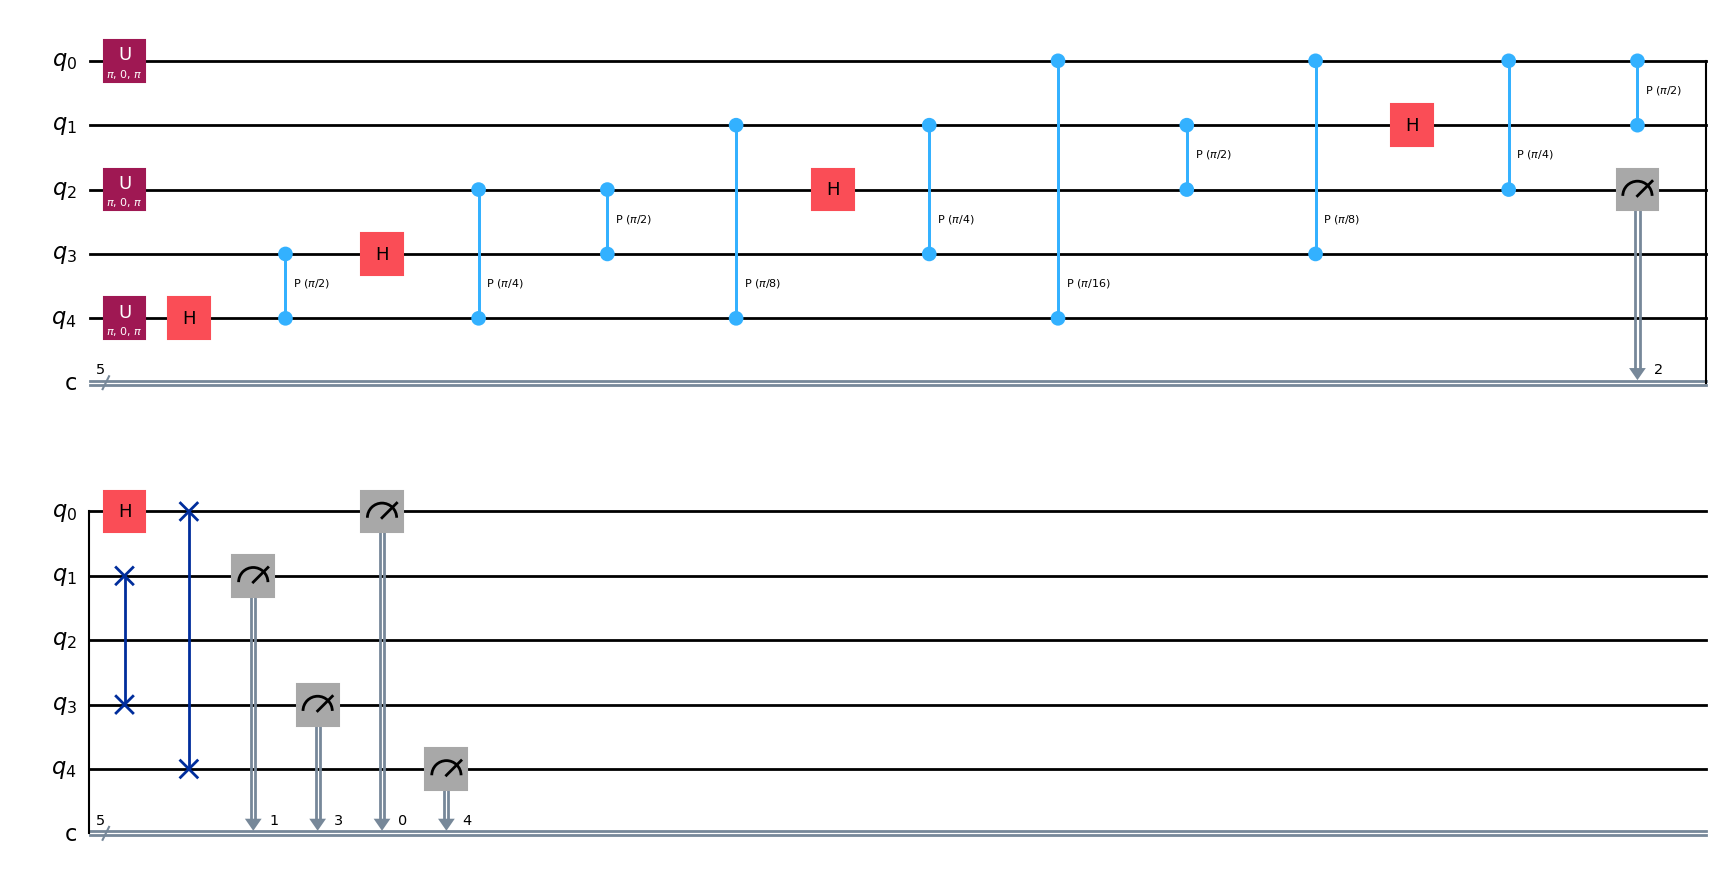

In [55]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
import numpy as np

pi = np.pi
 
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

circuit = QuantumCircuit(q, c)

circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft').to_gate()
circuit.append(qft, qargs=[0,1,2,3,4])
circuit.measure(q,c)
circuit.draw(output='mpl', filename='qft1.png')
print(circuit)
circuit.decompose(reps=2).draw()

In [56]:
#provider = IBMQ.get_provider(hub='ibm-q')
from qiskit.circuit.library import QFT
#backend = provider.get_backend('ibmq_qasm_simulator')
#backend = service.backend("ibm_backend", instance="h1/g1/p1")
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend = FakeManilaV2()

job = backend.run(circuit.decompose(reps=6), shots=1000)

#job_monitor(job)

counts = job.result().get_counts()

print("\n QFT Output")
print("-------------")
print(counts)


 QFT Output
-------------
{'01111': 23, '11111': 31, '01100': 33, '01001': 34, '01011': 24, '00011': 30, '11011': 28, '10101': 23, '00101': 30, '00000': 41, '10100': 39, '00111': 21, '11110': 38, '00001': 26, '11010': 38, '00100': 40, '10010': 30, '01101': 25, '10111': 21, '11100': 35, '01010': 39, '10110': 26, '11101': 25, '00110': 40, '10001': 21, '01000': 44, '11000': 41, '00010': 31, '11001': 23, '10000': 34, '01110': 32, '10011': 34}


     ┌───┐┌──────┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤0     ├┤M├────────────
     └───┘│      ││      │└╥┘┌─┐         
q_1: ─────┤1     ├┤1     ├─╫─┤M├─────────
     ┌───┐│      ││      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      ││      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      ││      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════════════╩══╩══╩══╩══╩═
                           0  1  2  3  4 


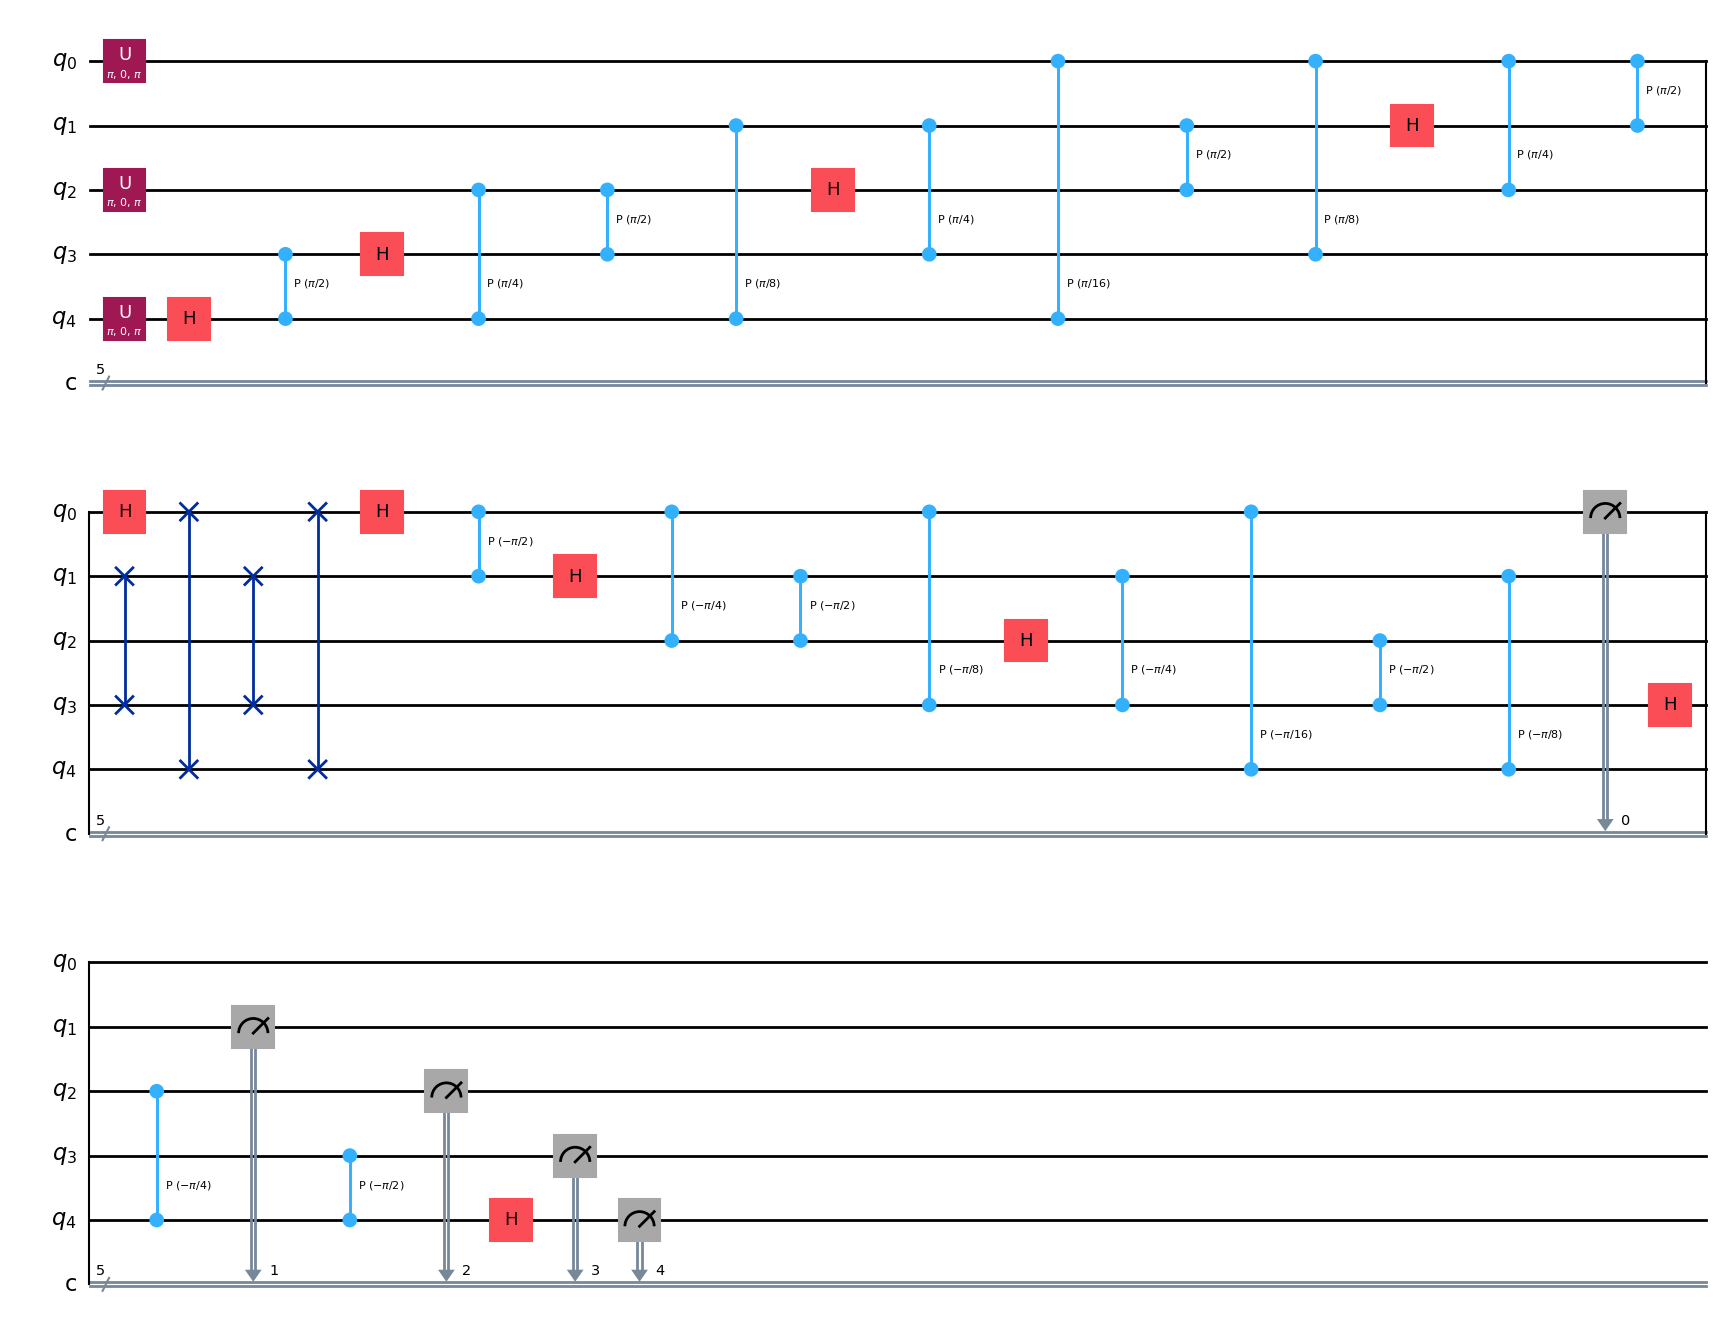

In [57]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')

circuit = QuantumCircuit(q,c)

circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft').to_gate()
#qft = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name='qft').to_gate()
circuit.append(qft, qargs=[0,1,2,3,4])
circuit.append(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=False, name='qft').to_gate(), qargs=[0,1,2,3,4])
circuit.measure(q,c)
circuit.draw(output='mpl',filename='qft2.png')
print(circuit)
circuit.decompose(reps=2).draw()

In [58]:
job = backend.run(circuit.decompose(reps=6), shots=1000)

counts = job.result().get_counts()

print("\n QFT with inverse QFT Output")
print("------------------------------")
print(counts)


 QFT with inverse QFT Output
------------------------------
{'00010': 1, '11011': 2, '01111': 1, '00000': 1, '00011': 3, '10100': 190, '00111': 1, '01110': 3, '10011': 20, '10111': 25, '01101': 7, '11000': 8, '01011': 5, '00001': 2, '11010': 2, '10010': 8, '01001': 4, '10000': 5, '11001': 16, '11101': 12, '01100': 5, '00100': 8, '10101': 567, '00101': 40, '11100': 5, '10001': 43, '11111': 3, '10110': 13}


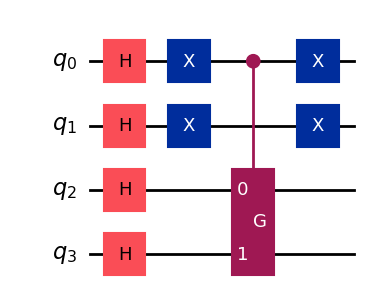

In [53]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import UnitaryGate 


qw = QuantumCircuit(4)
coin = np.array([[1, -1, -1, -1],
                                [-1, 1, -1, -1],
                                [-1, -1, 1, -1],
                                [-1, -1, -1, 1]]) / 2

# Convert the unitary matrix to a UnitaryGate
coin = UnitaryGate(coin, label='C')

# ====== Initial State Preparation 

qw.h(0)
qw.h(1)
qw.h(2)
qw.h(3)

# ----------------------------------

qw.x(0)
qw.x(1)

grover = -np.array([[1, -1, -1, -1],
                                [-1, 1, -1, -1],
                                [-1, -1, 1, -1],
                                [-1, -1, -1, 1]]) / 2

grover = UnitaryGate(grover, label='G')

# Apply the controlled unitary operation with qubits 0 and 1 as controls
# and qubits 2 and 3 as targets
qw.append(grover.control(1), [0,2, 3])

qw.x(0)
qw.x(1)

# Visualize the circuit
qw.draw('mpl')


In [60]:

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

# A fake 5 qubit backend.
backend = FakeManilaV2()
job = backend.run(qw.decompose(reps=6), shots=1000)



#transpiled_circuit = transpile(qw, backend)
#transpiled_circuit.draw('mpl', style="iqp")
 
# Run the transpiled circuit using the simulated fake backend
#job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'

In [ ]:

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = backend.run(qw)
result = job.result()
outputstate = result.get_statevector(qw, decimals=3)
print(outputstate)